Link to supporting video for below notebook walkhthrough - https://www.youtube.com/watch?v=91QljBnvM7s

In [1]:
#this command might be relevant ony on GPU nodes. But the notebook will run on CPU as well
#If running on CPU remove the command wherever it appears
!nvidia-smi

Fri Nov 25 16:02:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


In [3]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.5 MB 41 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.3-py2.py3-none-any.whl size=177541401 sha256=764d28114af1deb38f6a53c74c3b0cb1dd1f16061894c033647e337d6eb0ea65
  Stored in directory: /root/.cache/pip/wheels/27/c0/36/708db83f33c19ac70a7fbceea2fc175485732d84aeebf0c69e
Successfully built h2o


In [4]:
 import h2o

In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpbhyz62dj
  JVM stdout: /tmp/tmpbhyz62dj/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpbhyz62dj/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_unknownUser_t5bu8i
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [6]:
from h2o.automl import H2OAutoML

In [7]:
churn_df = h2o.import_file('https://drive.google.com/u/0/uc?id=14XVqtU6y7hs9LvrX5dyPSp5KCBix2PuX&export=download')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
churn_df.types

{'id': 'int',
 'y': 'int',
 'amount_current_loan': 'int',
 'term': 'enum',
 'credit_score': 'enum',
 'loan_purpose': 'enum',
 'yearly_income': 'int',
 'home_ownership': 'enum',
 'bankruptcies': 'int'}

In [ ]:
churn_df["y"]= churn_df["y"].asfactor()

In [ ]:
churn_df.describe()

Rows:1000000
Cols:9

,id,y,amount_current_loan,term,credit_score,loan_purpose,yearly_income,home_ownership,bankruptcies
type,int,enum,int,enum,enum,enum,int,enum,int
mins,1.0,,10802.0,,,,76627.0,,0.0
mean,500000.5,,316659.3714679997,,,,1344805.2238531003,,0.11921117617299239
maxs,1000000.0,,789250.0,,,,165557393.0,,7.0
sigma,288675.2789323441,,186863.51428798572,,,,1278949.921243987,,0.3546738360737797
zeros,0,,0,,,,0,,886855
missing,0,0,0,0,0,0,219439,0,1805
0,1.0,0,386342.0,short,very_good,other,1371971.0,rent,0.0
1,2.0,0,429000.0,short,good,debt_consolidation,823042.0,mortgage,0.0
2,3.0,0,344608.0,short,good,debt_consolidation,1316567.0,rent,0.0


In [ ]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.6, .2])

In [ ]:
churn_train

id,y,amount_current_loan,term,credit_score,loan_purpose,yearly_income,home_ownership,bankruptcies
3,0,344608,short,good,debt_consolidation,1.31657e+06,rent,0
4,0,71214,short,NA,debt_consolidation,nan,rent,0
7,0,317570,short,good,debt_consolidation,1.9376e+06,mortgage,0
8,0,227986,long,good,debt_consolidation,469680,rent,1
9,0,409354,short,good,other,815480,rent,0
10,0,206448,short,good,debt_consolidation,1.35979e+06,own,0
11,0,440880,short,good,debt_consolidation,1.72624e+06,rent,0
13,0,58564,short,very_good,home_improvements,2.84333e+06,mortgage,0
14,0,786786,long,good,debt_consolidation,1.74694e+06,mortgage,0
15,0,344718,long,good,debt_consolidation,1.2376e+06,rent,0


In [ ]:
y = "y"
x = churn_df.columns
x.remove(y)
x.remove("id")

In [ ]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)


In [ ]:
!nvidia-smi

Thu Nov 24 23:23:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
23:24:04.530: Project: AutoML_1_20221124_232404
23:24:04.531: Cross-validation disabled by user: no fold column nor nfolds > 1.
23:24:04.531: Setting stopping tolerance adaptively based on the training frame: 0.0012910955885183696
23:24:04.531: Build control seed: 10
23:24:04.532: training frame: Frame key: AutoML_1_20221124_232404_training_py_3_sid_8577    cols: 9    rows: 599906  chunks: 15    size: 9381373  checksum: -427971832108218882
23:24:04.532: validation frame: Frame key: py_5_sid_8577    cols: 9    rows: 199968  chunks: 15    size: 3154446  checksum: -102382498840671414
23:24:04.532: leaderboard frame: Frame key: py_5_sid_8577    cols: 9    rows: 199968  chunks: 15    size: 3154446  checksum: -102382498840671414
23:24:04.532: blending frame: NULL
23:24:04.532: response column: y
23:24:04.533: fold column: null
23:24:04.533: weights column: null
23:24:04.554: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20221124_232404


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    80                 80                          963883                 0            15           12.6125       1             2254          955.337

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.200661612969634
RMSE: 0.44795269054849307
LogLoss: 0.5745204950209503
Mean Per-Class Error: 0.36834579486452557
AUC: 0.7472127384922129
AUCPR: 0.7776008128185358
Gini: 0.49442547698442585

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3807214587221967
       0       1       Error    Rate
-----  ------  ------  -------  -------------------
0      120508  179101  0.5978   (179101.0/299609.0)
1      41714   258583  0.1389   (41714.0/300297.0)
Total  162222  437684  0.3681   (220815.0/599906.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.380721     0.700785  268
max f2                       0.225324     0.83591   357
max f0point5                 0.527387     0.687538  158
max accuracy                 0.478859     0.674251  194
max precision                0.995003     1         0
max recall                   0.101388     1         397
max specificity              0.995003     1         0
max absolute_mcc             0.542407     0.364803  147
max min_per_class_accuracy   0.461821     0.672391  206
max mean_per_class_accuracy  0.478859     0.674301  194
max tns                      0.995003     299609    0
max fns                      0.995003     299526    0
max fps                      0.0747486    299609    399
max tps                      0.101388     300297    397
max tnr                      0.995003     1         0
max fnr                      0.995003     0.997433  0
max fpr                      0.0747486    1         399
max tpr                      0.101388     1         397

Gains/Lift Table: Avg response rate: 50.06 %, avg score: 50.04 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100016                   0.992634           1.99771   1.99771            1                0.993534  1                           0.993534            0.0199802       0.0199802                  99.7709   99.7709            0.0199802
2        0.0200015                   0.99164            1.99771   1.99771            1                0.992124  1                           0.992829            0.0199769       0.0399571                  99.7709   99.7709            0.0399571
3        0.0300014                   0.990755           1.99771   1.99771            1                0.991198  1                           0.992285            0.0199769       0.059934                   99.7709   99.7709            0.059934
4        0.0400029                   0.989909           1.99771   1.99771            1                0.990325  1                           0.991795            0.0199802       0.0799142                  99.7709   99.7709            0.0799142
5        0.0500012                   0.98913            1.99771   1.99771            1                0.98952   1

In [ ]:
!nvidia-smi

Thu Nov 24 23:33:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    28W /  70W |    184MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
lb = aml.leaderboard

In [ ]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_1_20221124_232404,0.712935,0.592787,0.75041,0.411241,0.457282,0.209107
GBM_4_AutoML_1_20221124_232404,0.711659,0.593497,0.749254,0.421545,0.457576,0.209376
XGBoost_2_AutoML_1_20221124_232404,0.710415,0.593227,0.74816,0.418782,0.45796,0.209727
GBM_3_AutoML_1_20221124_232404,0.710217,0.59416,0.748041,0.41421,0.457988,0.209753
DRF_1_AutoML_1_20221124_232404,0.709574,0.59635,0.747063,0.411364,0.458551,0.210269
XRT_1_AutoML_1_20221124_232404,0.70933,0.607855,0.747014,0.416469,0.461654,0.213124
GBM_2_AutoML_1_20221124_232404,0.709108,0.594956,0.747147,0.413878,0.458318,0.210055
XGBoost_1_AutoML_1_20221124_232404,0.707848,0.59551,0.746269,0.41947,0.459038,0.210716
XGBoost_3_AutoML_1_20221124_232404,0.706401,0.595262,0.744817,0.426391,0.458996,0.210677
GLM_1_AutoML_1_20221124_232404,0.666361,0.650411,0.663462,0.427753,0.4785,0.228962


In [ ]:
churn_pred=aml.leader.predict(churn_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
churn_pred.head()

predict,p0,p1
0,0.841553,0.158447
1,0.47874,0.52126
1,0.452155,0.547845
0,0.724664,0.275336
0,0.780209,0.219791
0,0.840077,0.159923
1,0.594577,0.405423
0,0.817361,0.182639
1,0.514494,0.485506
0,0.660455,0.339545


In [ ]:
aml.leader.model_performance(churn_test)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.20999696236110346
RMSE: 0.45825425514784196
LogLoss: 0.5946982993324432
Mean Per-Class Error: 0.4188425576356101
AUC: 0.7088454080884647
AUCPR: 0.7464012611816497
Gini: 0.4176908161769295

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3410166395126453
       0      1       Error    Rate
-----  -----  ------  -------  ------------------
0      26621  73717   0.7347   (73717.0/100338.0)
1      10278  89510   0.103    (10278.0/99788.0)
Total  36899  163227  0.4197   (83995.0/200126.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.341017     0.680646  294
max f2                       0.177815     0.832783  378
max f0point5                 0.534079     0.652228  154
max accuracy                 0.488834     0.647427  187
max precision                0.995041     1         0
max recall                   0.0988248    1         396
max specificity              0.995041     1         0
max absolute_mcc             0.697013     0.332603  65
max min_per_class_accuracy   0.462259     0.64159   206
max mean_per_class_accuracy  0.488834     0.647235  187
max tns                      0.995041     100338    0
max fns                      0.995041     99550     0
max fps                      0.06942      100338    399
max tps                      0.0988248    99788     396
max tnr                      0.995041     1         0
max fnr                      0.995041     0.997615  0
max fpr                      0.06942      1         399
max tpr                      0.0988248    1         396

Gains/Lift Table: Avg response rate: 49.86 %, avg score: 50.03 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100037                   0.992587           2.00551   2.00551            1                0.993472  1                           0.993472            0.0200625       0.0200625                  100.551   100.551            0.0200625
2        0.0200024                   0.991588           2.00551   2.00551            1                0.992067  1                           0.99277             0.0200525       0.040115                   100.551   100.551            0.040115
3        0.0300011                   0.990696           2.00551   2.00551            1                0.991143  1                           0.992228            0.0200525       0.0601676                  100.551   100.551            0.0601676
4        0.0400048                   0.989837           2.00551   2.00551            1                0.990266  1                           0.991737            0.0200625       0.0802301                  100.551   100.551            0.0802301
5        0.0500035                   0.989051           2.00551   2.00551            1                0.98945   1                           0.99128             0.0200525       0.100283                   100.551   100.551            0.100283
6        0.100007                    0.778731           1.97084   1.98818            0.982712         0.969085  0.991356                    0.980182            0.0985489       0.198832                   97.0841   98.8176            0.197107
7        0.15                        0.65873            1.38953   1.78865            0.692854         0.699881  0.891868                    0.886761            0.0694673       0.268299                   38.9526   78.8653            0.235948
8      

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [ ]:
model_ids

['GBM_1_AutoML_1_20221124_232404',
 'GBM_4_AutoML_1_20221124_232404',
 'XGBoost_2_AutoML_1_20221124_232404',
 'GBM_3_AutoML_1_20221124_232404',
 'DRF_1_AutoML_1_20221124_232404',
 'XRT_1_AutoML_1_20221124_232404',
 'GBM_2_AutoML_1_20221124_232404',
 'XGBoost_1_AutoML_1_20221124_232404',
 'XGBoost_3_AutoML_1_20221124_232404',
 'GLM_1_AutoML_1_20221124_232404']

In [ ]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_2_AutoML_1_20221124_232404


Model Summary: 
    number_of_trees
--  -----------------
    40

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.2052301216277617
RMSE: 0.4530233124550675
LogLoss: 0.5833186032534683
Mean Per-Class Error: 0.3964514094828916
AUC: 0.7276802261855563
AUCPR: 0.7625640734478019
Gini: 0.45536045237111256

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3603951763723271
       0       1       Error    Rate
-----  ------  ------  -------  -------------------
0      97400   202209  0.6749   (202209.0/299609.0)
1      35433   264864  0.118    (35433.0/300297.0)
Total  132833  467073  0.3961   (237642.0/599906.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.360395     0.690316  272
max f2                       0.193431     0.834859  367
max f0point5                 0.527668     0.669034  149
max accuracy                 0.488138     0.659977  177
max precision                0.99917      1         0
max recall                   0.071976     1         398
max specificity              0.99917      1         0
max absolute_mcc             0.611451     0.345877  100
max min_per_class_accuracy   0.461805     0.656084  196
max mean_per_class_accuracy  0.488138     0.660054  177
max tns                      0.99917      299609    0
max fns                      0.99917      285734    0
max fps                      0.0613684    299609    399
max tps                      0.071976     300297    398
max tnr                      0.99917      1         0
max fnr                      0.99917      0.951505  0
max fpr                      0.0613684    1         399
max tpr                      0.071976     1         398

Gains/Lift Table: Avg response rate: 50.06 %, avg score: 50.09 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100132                   0.999204           1.99771   1.99771            1                0.999306  1                           0.999306            0.0200035       0.0200035                  99.7709   99.7709            0.0200035
2        0.0200181                   0.999084           1.99771   1.99771            1                0.999144  1                           0.999225            0.0199869       0.0399904                  99.7709   99.7709            0.0399904
3        0.0300264                   0.998972           1.99771   1.99771            1                0.999021  1                           0.999157            0.0199935       0.0599839                  99.7709   99.7709            0.0599839
4        0.0400029                   0.998893           1.99771   1.99771            1                0.998934  1                           0.999101            0.0199303       0.0799142                  99.7709   99.7709            0.0799142
5        0.0500062                   0.998796           1.99771   1.99771            1                0.998847  1                           0.99905             0.0199835       0.0998978                  99.7709   99.7709            0.0998978
6        0.100001                    0.799923           1.97813   1.98792            0.990197         0.982974  0.995099                    0.991013            0.0988954       0.198793                   97.8126   98.7919            0.197812
7        0.150009                    0.661592           1.46

In [ ]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [ ]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_2_AutoML_1_20221124_232404',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_2_AutoML_1_20221124_232404'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20221124_232404_training_py_3_sid_8577',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20221124_232404_training_py_3_sid_8577'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20221124_232404_training_py_3_sid_8577',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20221124_232404_training_py_3_sid_8577'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schem

In [ ]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'updater': 'grow_gpu_hist',
  'eta': 0.3,
  'objective': 'binary:logistic',
  'min_child_weight': 5.0,
  'nthread': 2,
  'seed': 13,
  'max_bin': 256,
  'max_depth': 10,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'gpu_id': 0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.6,
  'max_delta_step': 0.0,
  'colsample_bylevel': 0.8},
 10000)

In [ ]:
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_2_AutoML_1_20221124_232404


Model Summary: 
    number_of_trees
--  -----------------
    40

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.2052301216277617
RMSE: 0.4530233124550675
LogLoss: 0.5833186032534683
Mean Per-Class Error: 0.3964514094828916
AUC: 0.7276802261855563
AUCPR: 0.7625640734478019
Gini: 0.45536045237111256

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3603951763723271
       0       1       Error    Rate
-----  ------  ------  -------  -------------------
0      97400   202209  0.6749   (202209.0/299609.0)
1      35433   264864  0.118    (35433.0/300297.0)
Total  132833  467073  0.3961   (237642.0/599906.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.360395     0.690316  272
max f2                       0.193431     0.834859  367
max f0point5                 0.527668     0.669034  149
max accuracy                 0.488138     0.659977  177
max precision                0.99917      1         0
max recall                   0.071976     1         398
max specificity              0.99917      1         0
max absolute_mcc             0.611451     0.345877  100
max min_per_class_accuracy   0.461805     0.656084  196
max mean_per_class_accuracy  0.488138     0.660054  177
max tns                      0.99917      299609    0
max fns                      0.99917      285734    0
max fps                      0.0613684    299609    399
max tps                      0.071976     300297    398
max tnr                      0.99917      1         0
max fnr                      0.99917      0.951505  0
max fpr                      0.0613684    1         399
max tpr                      0.071976     1         398

Gains/Lift Table: Avg response rate: 50.06 %, avg score: 50.09 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100132                   0.999204           1.99771   1.99771            1                0.999306  1                           0.999306            0.0200035       0.0200035                  99.7709   99.7709            0.0200035
2        0.0200181                   0.999084           1.99771   1.99771            1                0.999144  1                           0.999225            0.0199869       0.0399904                  99.7709   99.7709            0.0399904
3        0.0300264                   0.998972           1.99771   1.99771            1                0.999021  1                           0.999157            0.0199935       0.0599839                  99.7709   99.7709            0.0599839
4        0.0400029                   0.998893           1.99771   1.99771            1                0.998934  1                           0.999101            0.0199303       0.0799142                  99.7709   99.7709            0.0799142
5        0.0500062                   0.998796           1.99771   1.99771            1                0.998847  1                           0.99905             0.0199835       0.0998978                  99.7709   99.7709            0.0998978
6        0.100001                    0.799923           1.97813   1.98792            0.990197         0.982974  0.995099                    0.991013            0.0988954       0.198793                   97.8126   98.7919            0.197812
7        0.150009                    0.661592           1.46

In [ ]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [ ]:
out.confusion_matrix()

,0,1,Error,Rate
0,97400.0,202209.0,0.6749,(202209.0/299609.0)
1,35433.0,264864.0,0.118,(35433.0/300297.0)
Total,132833.0,467073.0,0.3961,(237642.0/599906.0)


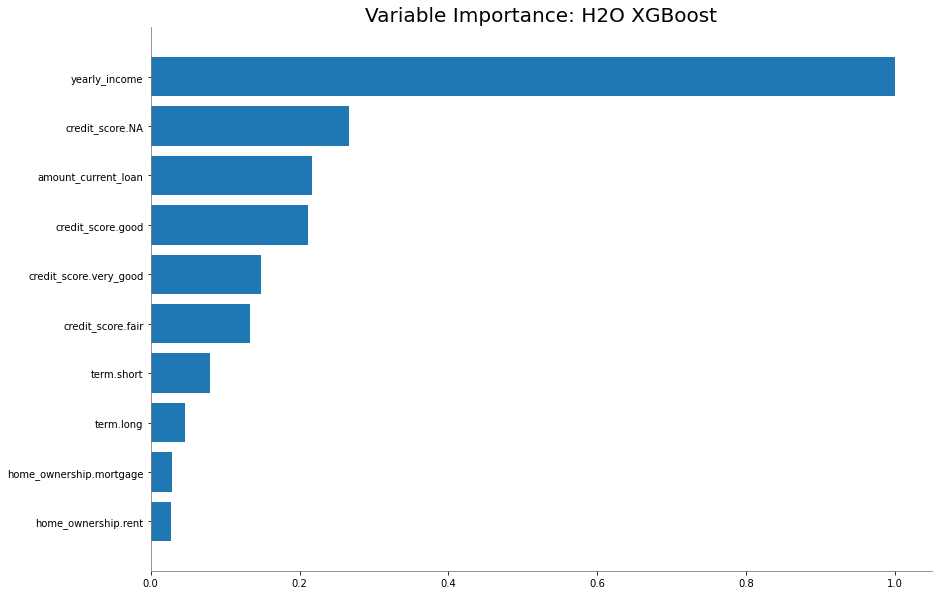

<Figure size 432x288 with 0 Axes>

In [ ]:
out.varimp_plot()

In [ ]:
aml.leader.download_mojo(path = "./")

'/content/GBM_1_AutoML_1_20221124_232404.zip'